In [1]:
# load packages
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# 1-Way ANOVA

    A   B   C   D
0  25  45  30  54
1  30  55  29  60
2  28  29  33  51
3  36  56  37  62
4  29  40  27  73


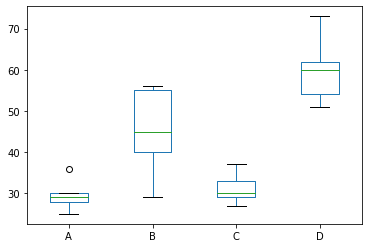

In [2]:
# load data file
d = pd.read_csv("onewayanova.txt", sep="\t")
print(d.head())
# generate a boxplot to see the data distribution by treatments. Using boxplot, we can easily detect the differences 
# between different treatments
d.boxplot(column=['A', 'B', 'C', 'D'], grid=False)

In [3]:
# stats f_oneway functions takes the groups as input and returns F and P-value
fvalue, pvalue = stats.f_oneway(d['A'], d['B'], d['C'], d['D'])
print(fvalue, pvalue)

17.492810457516338 2.639241146210922e-05


In [4]:
# get ANOVA table output
# reshape the d dataframe suitable for statsmodels package 
d_melt = pd.melt(d.reset_index(), id_vars=['index'], value_vars=['A', 'B', 'C', 'D'])
# replace column names
d_melt.columns = ['index', 'treatments', 'value']

In [5]:
d_melt

,index,treatments,value
0,0,A,25
1,1,A,30
2,2,A,28
3,3,A,36
4,4,A,29
5,0,B,45
6,1,B,55
7,2,B,29
8,3,B,56
9,4,B,40


In [8]:
d_melt[d_melt['treatments'] != 'D']

,index,treatments,value
0,0,A,25
1,1,A,30
2,2,A,28
3,3,A,36
4,4,A,29
5,0,B,45
6,1,B,55
7,2,B,29
8,3,B,56
9,4,B,40


In [6]:
# Ordinary Least Squares (OLS) model
model = ols('value ~ C(treatments)', data=d_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(treatments),3.0,3010.95,1003.650,17.49281,0.000026
Residual,16.0,918.00,57.375,NaN,NaN


In [7]:
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=d_melt['value'], groups=d_melt['treatments'], alpha=0.05)
print(m_comp)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     A      B     15.4 0.0251   1.6929 29.1071   True
     A      C      1.6    0.9 -12.1071 15.3071  False
     A      D     30.4  0.001  16.6929 44.1071   True
     B      C    -13.8 0.0482 -27.5071 -0.0929   True
     B      D     15.0 0.0296   1.2929 28.7071   True
     C      D     28.8  0.001  15.0929 42.5071   True
-----------------------------------------------------


Test ANOVA assumptions

- The Shapiro-Wilk test can be used to check the normal distribution of residuals . Null hypothesis: data is drawn from normal distribution.

In [10]:
w, pvalue = stats.shapiro(model.resid)
print(w, pvalue)

0.9685019850730896 0.7229772806167603


Conclusion: As the P-value is non significant, we fail to reject null hypothesis and conclude that data is drawn from normal distribution.

As the data is drawn from normal distribution, use Bartlett’s test to check the Homogeneity of variances. Null hypothesis: samples from populations have equal variances.

In [11]:
w, pvalue = stats.bartlett(d['A'], d['B'], d['C'], d['D'])
print(w, pvalue)

5.687843565012841 0.1278253399753447


Conclusion: As the P-value (0.12) is non significant, we fail to reject null hypothesis and conclude that treatments have equal variances.

# 2-Way ANOVA

In [12]:
# load data file
d = pd.read_csv("twowayanova.txt", sep="\t")
print(d.head())
# reshape the d dataframe suitable for statsmodels package 
# you do not need to reshape if your data is already in stacked format. Compare d and d_melt tables for detail 
# understanding 
d_melt = pd.melt(d, id_vars=['Genotype'], value_vars=['1_year', '2_year', '3_year'])
# replace column names
d_melt.columns = ['Genotype', 'years', 'value']
print(d_melt.head())

  Genotype  1_year  2_year  3_year
0        A    1.53    4.08    6.69
1        A    1.83    3.84    5.97
2        A    1.38    3.96    6.33
3        B    3.60    5.70    8.55
4        B    2.94    5.07    7.95
  Genotype   years  value
0        A  1_year   1.53
1        A  1_year   1.83
2        A  1_year   1.38
3        B  1_year   3.60
4        B  1_year   2.94


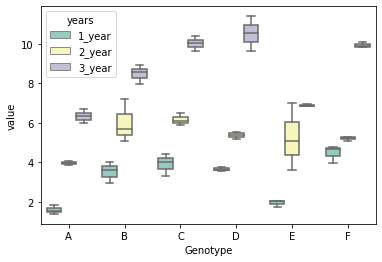

In [13]:
# generate a boxplot to see the data distribution by genotypes and years. Using boxplot, we can easily detect the 
# differences between different groups
sns.boxplot(x="Genotype", y="value", hue="years", data=d_melt, palette="Set3") 

In [14]:
# Ordinary Least Squares (OLS) model
# C(Genotype):C(years) represent interaction term
model = ols('value ~ C(Genotype) + C(years) + C(Genotype):C(years)', data=d_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Genotype),58.551733,5.0,32.748581,1.931655e-12
C(years),278.925633,2.0,390.014868,4.006243e-25
C(Genotype):C(years),17.122967,10.0,4.788525,2.230094e-04
Residual,12.873000,36.0,NaN,NaN


## Complete the remaining part
- Pair-wise comparison
- Shapiro test
- Bartlett’s test